In [132]:
## all imports
from IPython.display import HTML
import numpy as np
import urllib.request  as urllib2 
import bs4 #this is beautiful soup

from pandas import Series
import pandas as pd
from pandas import DataFrame

import matplotlib as mpl # this actually imports matplotlib
import matplotlib.cm as cm #allows us easy access to colormaps
import matplotlib.pyplot as plt #sets up plotting under plt
%matplotlib inline

import seaborn as sns
sns.set_context("talk")
sns.set_style("white")

import time
import re


from matplotlib.ticker import OldScalarFormatter, ScalarFormatter
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter

pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

In [133]:
url = 'http://www.internetlivestats.com/internet-users/'
source = urllib2.urlopen(url).read()
bs_tree = bs4.BeautifulSoup(source, 'lxml')

In [134]:
table = bs_tree.find('table', class_='table table-striped table-bordered table-hover table-condensed table-list')

In [135]:
tb_rows = table.find_all('tr')
list_rows = []

for tr in tb_rows:
    td = tr.find_all('td')
    rows = [i.text for i in td]
    list_rows.append(rows)
    print(rows)

['Year ', 'Internet Users**', 'Penetration (% of Pop) ', 'World Population', 'Non-Users (Internetless) ', '1Y User  Change ', '1Y User Change ', 'World Pop. Change']
['2016*', '3,424,971,237 ', '46.1 %', '7,432,663,275', '4,007,692,038', '7.5 %', '238,975,082', ' 1.13 %']
['2015*', '3,185,996,155 ', '43.4 %', '7,349,472,099', '4,163,475,944', '7.8 %', '229,610,586', '1.15 %']
['2014', '2,956,385,569 ', '40.7 %', '7,265,785,946', '4,309,400,377', '8.4 %', '227,957,462', '1.17 %']
['2013', '2,728,428,107 ', '38 %', '7,181,715,139', '4,453,287,032', '9.4 %', '233,691,859', '1.19 %']
['2012', '2,494,736,248 ', '35.1 %', '7,097,500,453', '4,602,764,205', '11.8 %', '262,778,889', '1.2 %']
['2011', '2,231,957,359 ', '31.8 %', '7,013,427,052', '4,781,469,693', '10.3 %', '208,754,385', '1.21 %']
['2010', '2,023,202,974 ', '29.2 %', '6,929,725,043', '4,906,522,069', '14.5 %', '256,799,160', '1.22 %']
['2009', '1,766,403,814 ', '25.8 %', '6,846,479,521', '5,080,075,707', '12.1 %', '191,336,294', 

In [191]:
Int_world = pd.DataFrame(list_rows[1:], columns=list_rows[0])
ch_per = pd.read_excel('young_int.xlsx')
dec_tim = pd.read_excel('decrese_time.xlsx')

In [192]:
list1 = [48.0, 39.3, 30.5, 25.2, 20.1, 19.2]
list2 = ['65+', '50-64', '35-49', '25-34', '18-24', '12-17']
df = pd.DataFrame(
    {'Hours per week': list1,
    'Groups': list2})
df


,Groups,Hours per week
0,65+,48.0
1,50-64,39.3
2,35-49,30.5
3,25-34,25.2
4,18-24,20.1
5,12-17,19.2


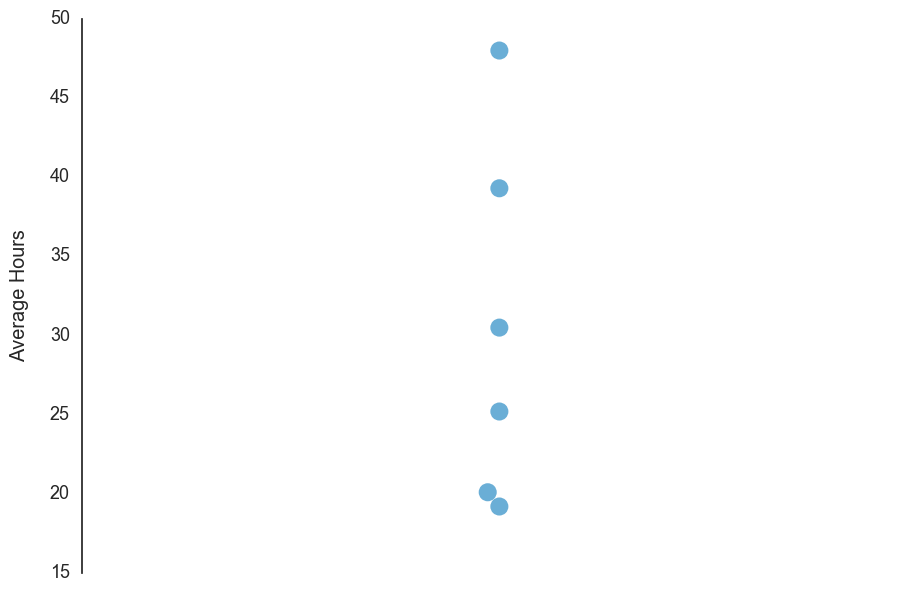

In [247]:
with sns.axes_style('white'):
    d = sns.swarmplot(y = 'Hours per week', hue = 'Groups', data = df, palette='Blues',
                     size = 13)
    plt.ylabel('Average Hours', labelpad = 15)
    sns.despine(trim = True, offset = 10)

In [194]:
Int_world.dtypes

Year                         object
Internet Users**             object
Penetration (% of Pop)       object
World Population             object
Non-Users (Internetless)     object
1Y User  Change              object
1Y User Change               object
World Pop. Change            object
dtype: object

In [195]:
Int_world['Internet Users**'] = Int_world['Internet Users**'].str.replace(r',', '')
Int_world['Internet Users**'] = Int_world['Internet Users**'].astype(np.int64)

In [196]:
Int_world['Year '] = Int_world['Year '].str.replace(r'*', '')
Int_world.dtypes

Year                         object
Internet Users**              int64
Penetration (% of Pop)       object
World Population             object
Non-Users (Internetless)     object
1Y User  Change              object
1Y User Change               object
World Pop. Change            object
dtype: object

In [197]:
year_arr = np.arange(2000, 2017, 1)
year_arr = [str(i) for i in year_arr]


NameError: name 'fig' is not defined

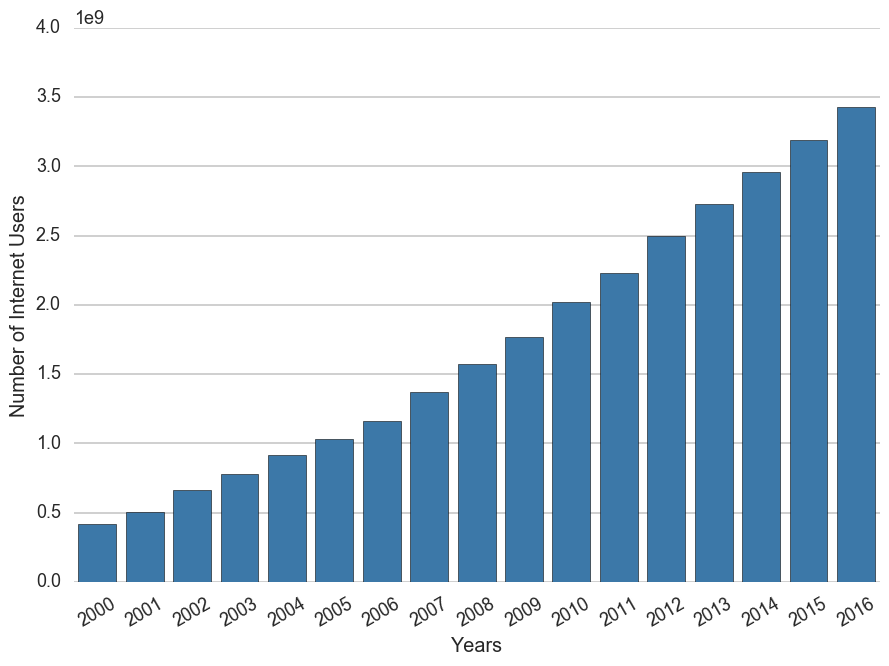

In [198]:
with sns.axes_style('whitegrid'):
    sns.barplot(x = 'Year ', y = 'Internet Users**', data = Int_world, order = year_arr, 
                color=(0.16696656059985066, 0.48069205132185244, 0.72915034294128422),
               label = 'Internet Users')
    plt.ylim((0, 4000000000))
    plt.ylabel('Number of Internet Users')
    plt.xlabel('Years')
    plt.xticks(rotation=30)
    sns.despine(trim = True, offset = 10, left = True, bottom = True)
    plt.yticks(fig.get_yticks(), fig.get_yticks() * 100)
    plt.legend()


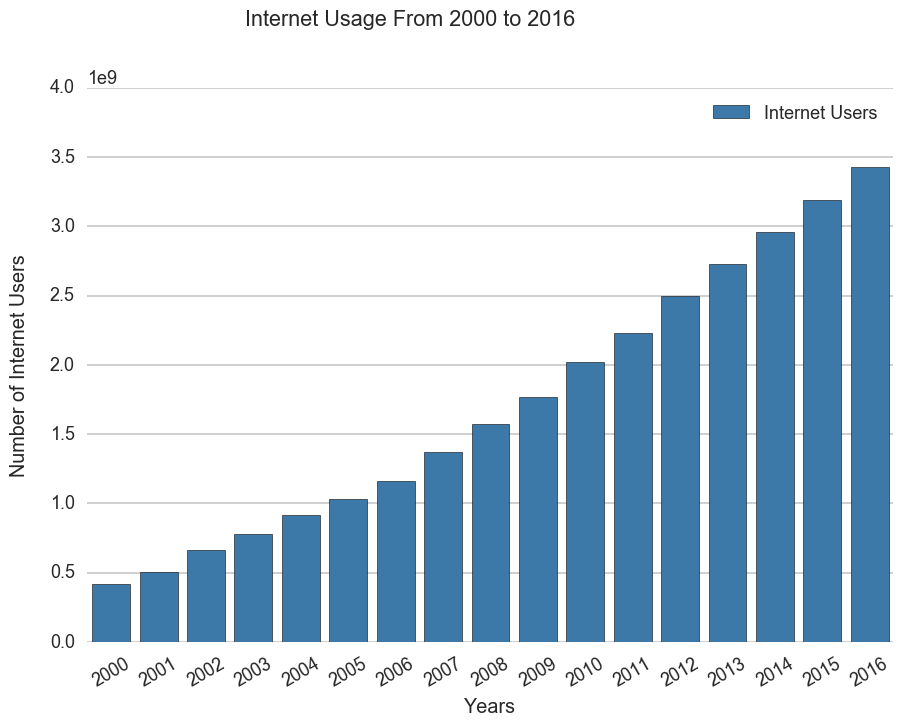

In [162]:


with sns.axes_style('whitegrid'):
    a = sns.barplot(x = 'Year ', y = 'Internet Users**', data = Int_world, order = year_arr, 
                color=(0.16696656059985066, 0.48069205132185244, 0.72915034294128422),
               label = 'Internet Users')
    plt.ylim((0, 4000000000))
    plt.ylabel('Number of Internet Users', labelpad = 15)
    plt.xlabel('Years')
    plt.xticks(rotation=30)
    plt.title('Internet Usage From 2000 to 2016')
    ttl = a.title
    ttl.set_position([.4, 1.10])
    sns.despine(trim = True, offset = 10, left = True, bottom = True)
    plt.legend()
    #a.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

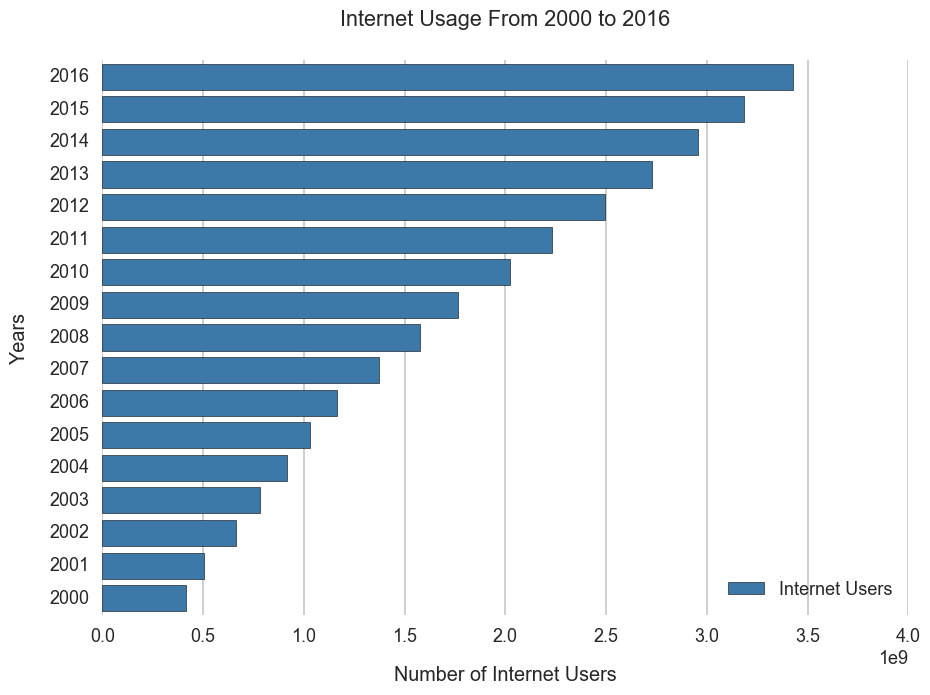

In [258]:
with sns.axes_style('whitegrid'):
    b = sns.barplot(x = 'Internet Users**',
                y = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q'], data = Int_world,
               color=(0.16696656059985066, 0.48069205132185244, 0.72915034294128422),
               label = 'Internet Users')
    plt.xlim((0, 4000000000))
    plt.ylabel('Years', labelpad = 15)
    plt.xlabel('Number of Internet Users', labelpad = 15)
    plt.title('Internet Usage From 2000 to 2016')
    ttl = b.title
    ttl.set_position([.5, 1.05])
    sns.despine(trim = True, offset = 10, left = True, bottom = True)
    plt.legend(loc=4)
    plt.yticks(np.arange(17), np.arange(2016, 1999, -1))
    

In [200]:
sns.barplot?

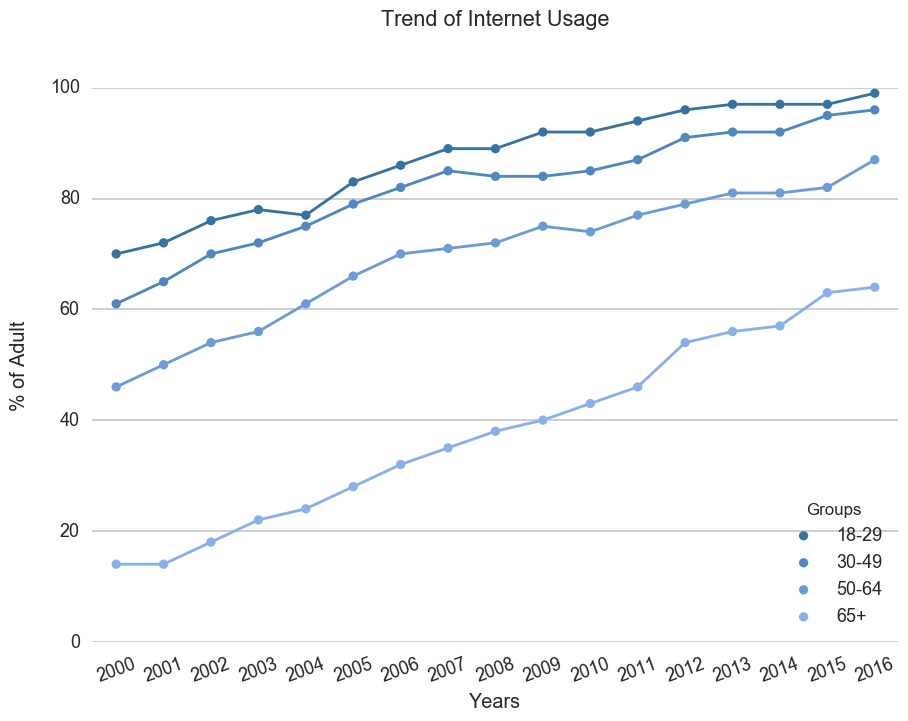

In [257]:
with sns.axes_style('whitegrid'):
    k = sns.pointplot(x = 'Years', y = '% of Adult', hue = 'Groups', data = ch_per,
                 scale = 0.5, linestyles = '-', 
                  palette = sns.cubehelix_palette(start=2.57, rot=.1, reverse = True, dark = 0.4, hue = 1.3))
    plt.xticks(rotation = 20)
    plt.ylim(0,100)
    plt.ylabel('% of Adult', labelpad = 15)
    sns.despine(trim = True, offset = 10, left = True, bottom = True)
    plt.title('Trend of Internet Usage')
    ttl = k.title
    ttl.set_position([.5, 1.1])


In [234]:
ch_per1 = ch_per[ch_per1.Groups == '18-29']

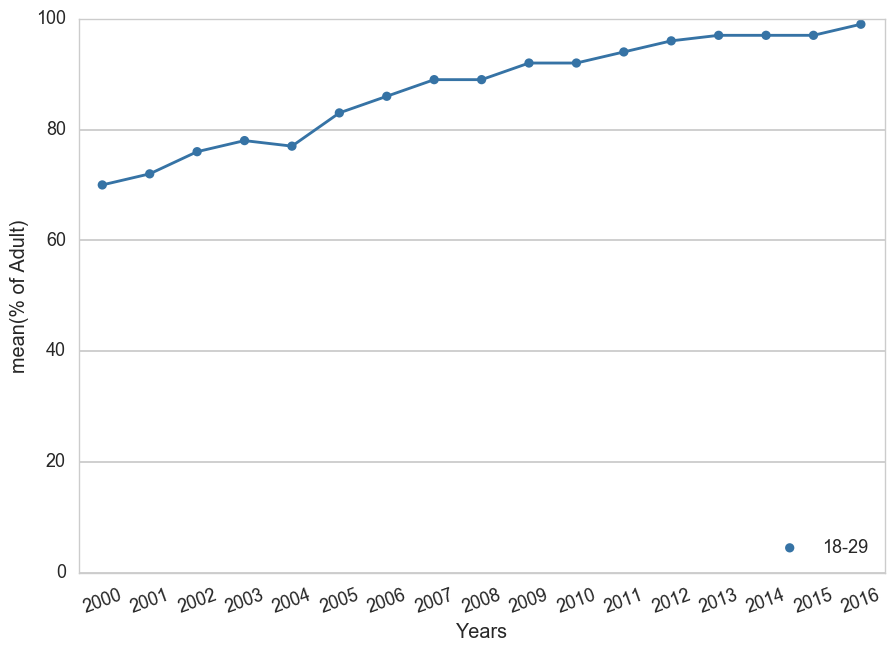

In [239]:
with sns.axes_style('whitegrid'):
    sns.pointplot(x = 'Years', y = '% of Adult', hue = 'Groups', data = ch_per1,
                 scale = 0.5, linestyles = '-', 
                  palette = sns.cubehelix_palette(start=2.57, rot=.1, reverse = True, dark = 0.4, hue = 1.3),
                 label = '18-29')
    plt.xticks(rotation = 20)
    plt.ylim((0,100))
    plt.legend(loc=4)

In [58]:
dec_tim.iloc[0,1] = '12-17'
dec_tim.dtypes

5 year contraction    float64
groups                 object
dtype: object

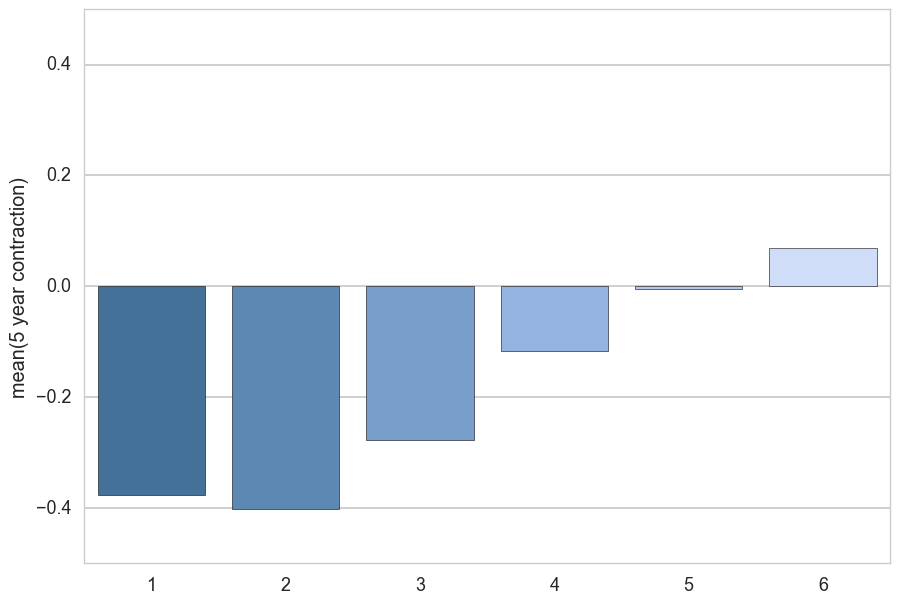

In [121]:
with sns.axes_style('whitegrid'):
    sns.barplot(x = [1,2,3,4,5,6], y = '5 year contraction', data = dec_tim,
               palette = sns.cubehelix_palette(start=2.57, rot=.1, reverse = True, dark = 0.4, hue = 1.3)
               )
    plt.ylim((-0.5,0.5))
    plt.figure(figsize=(8, 6))
    

In [32]:
labatt = pd.read_excel('Data Set Beer Brand Mix 0915_0916_V3.csv.xlsx')
labatt = labatt[(labatt['PRODUCT'] != 'GRAND TOTAL') & (labatt['PRODUCT'] != 'Corona : Imported Beer')]

labatt

,PRODUCT,TOTAL DOLS (000),NETWORK TV DOLS (000),CABLE TV DOLS (000),MAGAZINES DOLS (000),INTERNET DOLS (000)
0,Coors : Beer,255.7,NaN,2.5,NaN,253.2
1,Labatt Blue : Imported Beer,435.3,150.5,278.5,NaN,6.3
2,Miller High Life : Beer,6110.0,NaN,4828.9,1014.7,266.4
3,Samuel Adams Boston : Lager,11801.7,37.8,11743.2,NaN,20.6
4,Blue Moon : Beer,13144.4,3248.2,8683.6,825.6,387.1
5,Stella Artois : Imported Beer,53336.3,24802.8,13449.1,10040.0,5044.5
6,Budweiser : Beer,100266.3,62704.6,26899.2,899.8,9762.7
8,Coors Light : Beer,119237.7,54073.6,52089.3,10982.9,2091.9


0                     Coors : Beer
1      Labatt Blue : Imported Beer
2          Miller High Life : Beer
3      Samuel Adams Boston : Lager
4                 Blue Moon : Beer
5    Stella Artois : Imported Beer
6                 Budweiser : Beer
8               Coors Light : Beer
Name: PRODUCT, dtype: object

In [37]:
labatt.PRODUCT = ['Coors', 'Labatt Blue', 'Miller', ' Samuel Adams', 'Blue Moon', 'Stella Artois', 'Budweiser', 'Coors Light']
labatt.PRODUCT

0            Coors
1      Labatt Blue
2           Miller
3     Samuel Adams
4        Blue Moon
5    Stella Artois
6        Budweiser
8      Coors Light
Name: PRODUCT, dtype: object

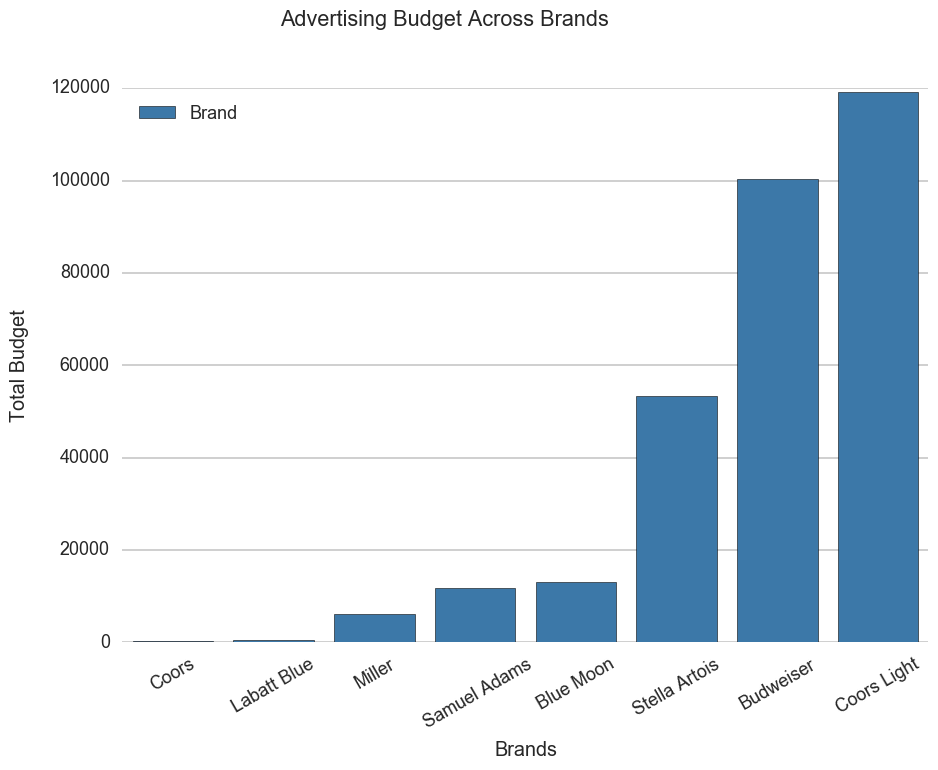

In [233]:
with sns.axes_style('whitegrid'):
    c = sns.barplot( y = 'TOTAL DOLS (000)', x = 'PRODUCT', data = labatt, 
                    color=(0.16696656059985066, 0.48069205132185244, 0.72915034294128422),
                   label = 'Brand')
    plt.xticks(rotation = 30)
    plt.legend(loc = 2)
    plt.ylabel('Total Budget', labelpad = 15)
    plt.xlabel('Brands')
    plt.xticks(rotation=30)
    plt.title('Advertising Budget Across Brands')
    ttl = c.title
    ttl.set_position([.4, 1.10])
    sns.despine(trim = True, offset = 10, left = True, bottom = True)

In [69]:
list_a = [278.5+150.5, 6.3]
list_b = ['TV', 'Internet']
list_aa = (278.5+150.5, 6.3)
dd = pd.DataFrame(
    {'amount': list_a, 
     'type': list_b})

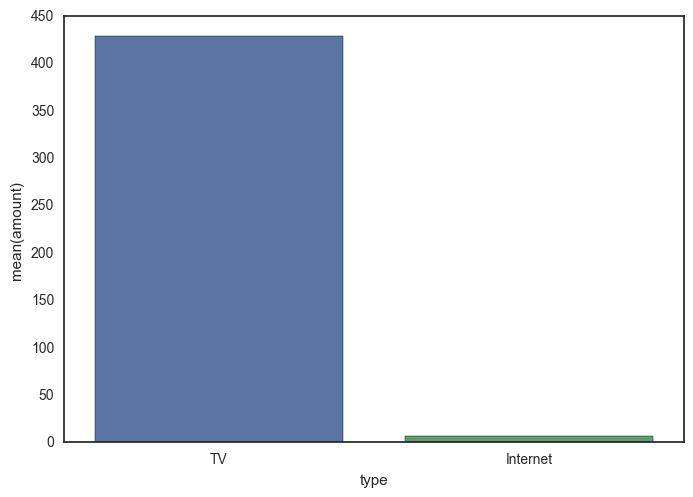

In [95]:
with sns.axes_style('white'):
    sns.barplot(x = 'type', y = 'amount', data = pd.DataFrame(
    {'amount': list_a, 
     'type': list_b}),
               )
    plt.figure(figsize=(8, 0.1))
    

AttributeError: Unknown property figsize

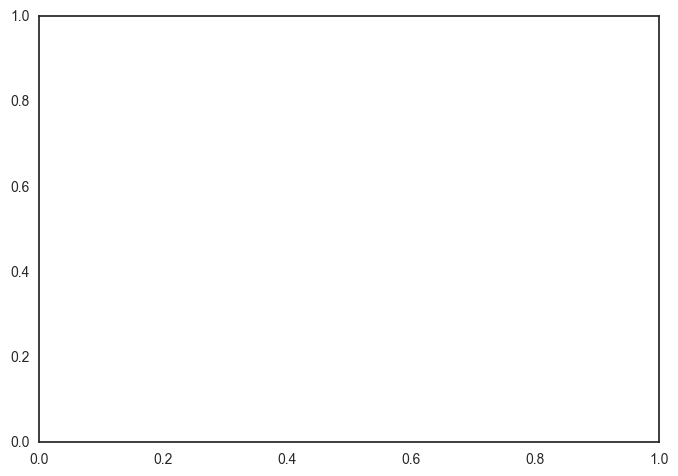

In [93]:
with sns.axes_style('white'):
    plt.bar(np.arange(2), list_aa, 0.2, figsize=(2,7))
    plt.xticks(np.arange(2) + 0.2 / 2, ('TV', 'Internet'))

In [57]:
bar?

Object `bar` not found.


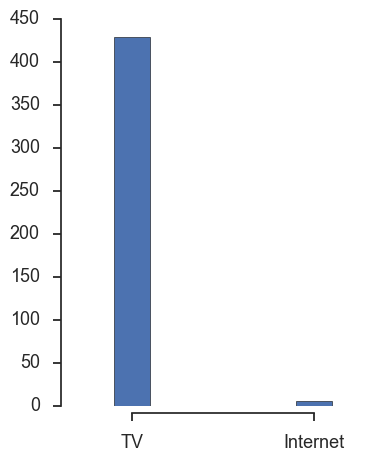

In [130]:

with sns.axes_style('ticks'):
    dd.plot(kind = 'bar', width = 0.2, figsize = (4,5), legend = False)
    plt.xticks(np.arange(2),('TV', 'Internet'))
    plt.xticks(rotation = 90)
    sns.despine(trim = True, offset = 5, left = False, bottom = False)


In [96]:
plt.xticks?

In [149]:
sns.barplot?


In [244]:
sns.swarmplot?